# Super Bowl Data Analysis
The Super Bowl is much more than a football game—it's a cultural phenomenon. Whether you're a sports enthusiast captivated by dramatic comebacks and controversies, a fan of creative and often extravagant advertisements, or someone drawn to the blockbuster halftime performances by the world's biggest artists, there's something for everyone.

For this project, I analyzed a dataset scraped and refined from Wikipedia, encompassing data from 52 Super Bowls through 2018. The dataset is split across three CSV files: game statistics, television metrics, and halftime show details. Each file provides unique insights into different facets of the Super Bowl experience.

## The Data
<ol><li>Halftime Musicians
<ul><li>File: <code>halftime_musicians.csv</code></li>
<li>Description: Information about the halftime performers, including the number of songs they performed.</li>
Key Columns:
<li>super_bowl: Super Bowl number (e.g., 52 for Super Bowl LII).</li>
<li>musician: Name of the musician or group.</li>
<li>num_songs: Number of songs performed.<br></li></ul></li>
<li>Super Bowl Games</li>
<ul><li>File: <code>super_bowls.csv</code></li>
<li>Description: Details about each Super Bowl, including the date, location, participating teams, and scores.</li>
Key Columns:
<li>difference_pts: Point difference between the winning and losing teams.</li></ul>
<li>Television Metrics</li>
<ul><li>File: <code>tv.csv</code></li>
<li>Description: Television viewership statistics and advertisement costs associated with each Super Bowl.</li></ul></ol>
This project is part of my portfolio to showcase data analysis and visualization skills. It highlights my ability to work with real-world datasets, extract meaningful insights, and present findings in a structured and engaging way. Explore the repository for code, analysis, and visualizations!

## Inspecting the Datasets
In this project, we are organizing our code into reusable functions. This approach provides several benefits:

<ol><li>Improved Readability:<br>

By breaking the code into smaller, named blocks, it's easier to understand what each part of the analysis is doing at a glance.
Reusability:<br>

Functions allow us to reuse code without rewriting it. For example, if we need to load and preview another dataset, we can simply call the same function.</li>
<li>Modularity:<br>

Each function handles a specific task (e.g., loading data, creating a plot). This separation of concerns makes the notebook easier to maintain and debug.</li>
<li>Scalability:<br>

If this project grows in complexity, having modular functions will make it easier to extend or adapt the analysis.</li>
<li>Professionalism:<br>

Structuring code with functions is a hallmark of professional programming. It demonstrates your ability to write clean, maintainable, and efficient code.</li></ol>
By following this practice, we ensure that our project is well-organized and adheres to coding standards, making it a strong addition to a portfolio.

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
# Function to load and preview data
def load_and_preview_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Data from {file_path} loaded successfully!")
    print(f"Preview of {file_path}:")
    display(df.head())
    return df

# Function to visualize TV viewership trends
def plot_viewership(tv_data):
    plt.figure(figsize=(10, 6))
    plt.plot(tv_data['super_bowl'], tv_data['avg_us_viewers'], marker='o', linestyle='-')
    plt.title('Average Number of US Viewers Over Super Bowls')
    plt.xlabel('Super Bowl')
    plt.ylabel('Average US Viewers (Millions)')
    plt.grid(True)
    plt.show()

# Function to analyze Super Bowl score differences
def analyze_point_differences(super_bowls_data):
    plt.figure(figsize=(10, 6))
    plt.hist(super_bowls_data['difference_pts'], bins=10, edgecolor='black')
    plt.title('Distribution of Point Differences')
    plt.xlabel('Point Difference')
    plt.ylabel('Number of Super Bowls')
    plt.grid(True)
    plt.show()
    high_diff_games = super_bowls_data[super_bowls_data['difference_pts'] > 40]
    print(f"Number of games with a point difference over 40: {len(high_diff_games)}")
    display(high_diff_games)

    # Function to truncate artist names to a maximum character length
def truncate_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

    # Function to analyze halftime musicians
def analyze_halftime_shows(halftime_data):
    most_songs = halftime_data.groupby('musician')['num_songs'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Musicians by Total Songs Performed in Halftime Shows:")
    display(most_songs)

    # Truncate artist names for better visualization
    most_songs.index = most_songs.index.map(truncate_label)


    # Visualization
    plt.figure(figsize=(12, 6))
    most_songs.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Musicians by Total Songs Performed')
    plt.xlabel('Musician')
    plt.ylabel('Total Songs')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Loading and Analyzing Datasets
Now that we've defined our reusable functions, we can load and analyze each dataset. Below is an overview of what we aim to achieve with each dataset:

**TV Viewership Data:**<br>

We’ll load the TV viewership dataset to analyze trends in audience engagement over the years.<br>
Visualizing this data will help us identify any patterns or key moments that influenced viewership numbers.<br><br>
**Super Bowl Game Data:**<br>

This dataset contains details about the games themselves, including point differences between teams.<br>
We’ll analyze the distribution of point differences to understand the competitiveness of Super Bowl games and highlight significant blowouts.<br><br>
**Halftime Show Data:**<br>

Finally, we’ll explore the halftime musicians dataset to identify the most prolific performers and analyze trends in halftime show entertainment.

Data from datasets/tv.csv loaded successfully!
Preview of datasets/tv.csv:


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


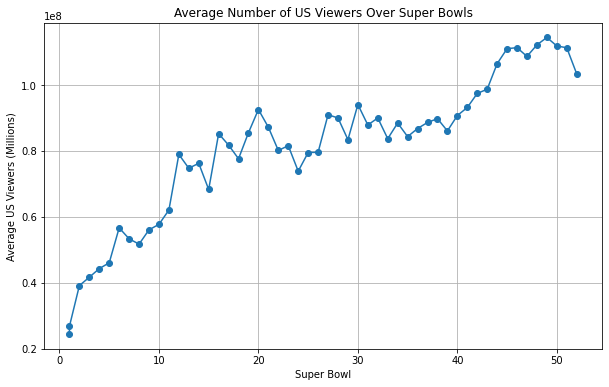

Data from datasets/super_bowls.csv loaded successfully!
Preview of datasets/super_bowls.csv:


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


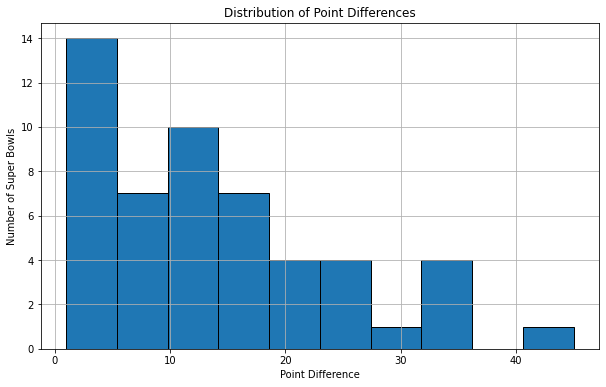

Number of games with a point difference over 40: 1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


Data from datasets/halftime_musicians.csv loaded successfully!
Preview of datasets/halftime_musicians.csv:


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


Top 10 Musicians by Total Songs Performed in Halftime Shows:


musician
Justin Timberlake                                 12.0
Beyoncé                                           10.0
Diana Ross                                        10.0
Grambling State University Tiger Marching Band     9.0
Bruno Mars                                         9.0
Katy Perry                                         8.0
Spirit of Troy                                     8.0
The Florida State University Marching Chiefs       7.0
Lady Gaga                                          7.0
Prince                                             7.0
Name: num_songs, dtype: float64

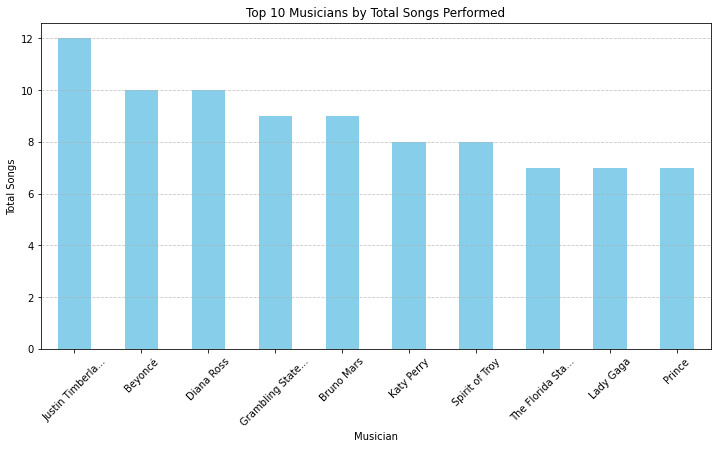

In [8]:
# Load and analyze datasets
tv = load_and_preview_data("datasets/tv.csv")
plot_viewership(tv)

super_bowls = load_and_preview_data("datasets/super_bowls.csv")
analyze_point_differences(super_bowls)

halftime_musicians = load_and_preview_data("datasets/halftime_musicians.csv")
analyze_halftime_shows(halftime_musicians)

## Conclusion
*What these steps do?*<br><br>
**TV Viewership Data Analysis:**<br>

This step loads the <code>tv.csv</code> file, previews its structure, and visualizes average US viewership over time.<br>
**Key Question:** How has Super Bowl viewership evolved, and can we spot any interesting trends?<br><br>
**Super Bowl Game Data Analysis:**<br>

This step explores the <code>super_bowls.csv</code> file to analyze point differences and competitiveness.<br>
**Key Question:** How often do games end in significant blowouts, and what are the characteristics of these games?<br><br>
**Halftime Show Data Analysis:**<br>

This step examines the <code>halftime_musicians.csv</code> file, focusing on performers and the number of songs played.<br>
**Key Question:** Which musicians have dominated the halftime stage, and how has the entertainment evolved?